# ft_linear_regression

In [1]:
import pandas as pd # таблички
import matplotlib.pyplot as plt # графики
%matplotlib inline
import seaborn as sns # cool графики

In [2]:
data = pd.read_csv("data.csv")
data.head(2)

,km,price
0,240000,3650
1,139800,3800


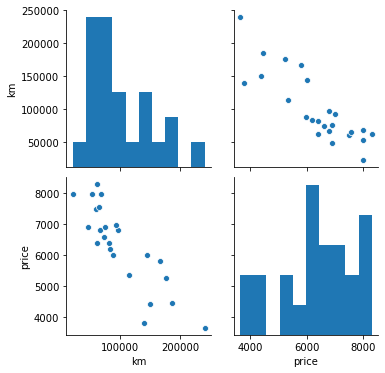

In [3]:
sns.pairplot(data)

У нас парная регрессия

у упарной регрессии признак всего один - пробег

## What you have to do

In [4]:
def estimate_Price(mileage): # Линейный алгоритм
    return mileage * th1 + th0
def mse(): # функция ошибки 
    return ((data['km'] * th1 + th0 - data['price']) ** 2).mean()
def derivative_th0():# Оптимизационный подход к решению
    return 2 * (estimate_Price(data['km']) - data['price']).mean()
def derivative_th1():
    return 2 * ((estimate_Price(data['km']) - data['price']) * data['km']).mean()

In [5]:
data['km'] = (data['km'] - data['km'].mean(axis=0)) / data['km'].std(axis=0)

In [6]:
th0 = 0
th1 = 0
mas0 = []
mas1 = []
mas_mse = []
mas0.append(th0)
mas1.append(th1)
E = 0.002
lr = 0.001 # 0.002 * 2
n_epochs = 100000
for epoch in range(n_epochs):
    der_th0 = derivative_th0()
    der_th1 = derivative_th1()
    th0 = mas0[epoch] - lr * der_th0
    th1 = mas1[epoch] - lr * der_th1
    mas0.append(th0)
    mas1.append(th1)
    mas_mse.append(mse())
    if abs(mas1[epoch + 1] - mas1[epoch]) < E:
        print('win')
        break;
print('\nepoch =', epoch, 'lr =', lr)
print('th0 =', th0,'th1 =', th1)
print('mse =', mse())

win

epoch = 3643 lr = 0.001
th0 = 6327.535773558487 th1 = -1128.7684471908626
mse = 445664.74968602153


### Аналитический спосбо решения задачи 

In [8]:
import numpy as np

In [9]:
X = data['km'].values
y = data['price'].values
X = np.hstack((X.reshape(len(X), 1), np.ones(len(X)).reshape(len(X), 1)))

In [10]:
def normal_equation(X, y):
    return np.dot(np.linalg.pinv(X), y)

In [11]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[-1129.80797621  6331.83333333]


### Графика

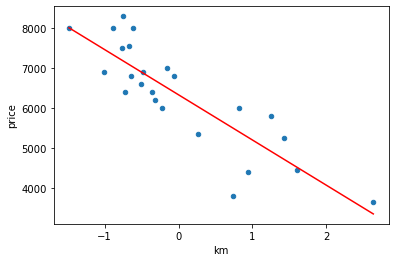

In [12]:
data.plot(x = 'km', y = 'price', kind='scatter')
x = np.linspace(min(data['km']), max(data['km']))
plt.plot(x, th0 + th1 * x, 'r', label = 'line1')

Text(0, 0.5, 'values')

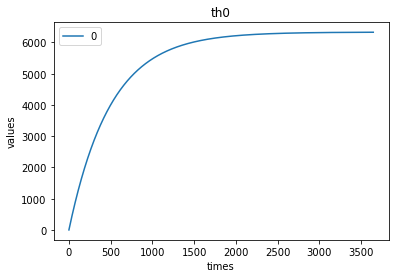

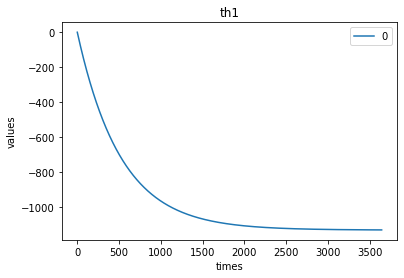

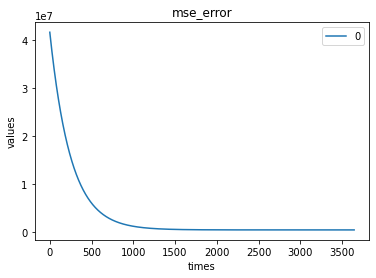

In [13]:
pd.DataFrame(mas0).plot(title='th0')
plt.xlabel('times')
plt.ylabel('values')
pd.DataFrame(mas1).plot(title='th1')
plt.xlabel('times')
plt.ylabel('values')
pd.DataFrame(mas_mse).plot(title='mse_error')
plt.xlabel('times')
plt.ylabel('values')